In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

2023-05-23 12:18:55.460994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape
y_train.shape

(50000, 1)

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

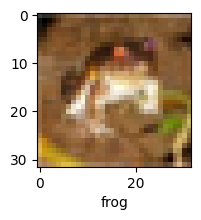

In [7]:
plot_sample(X_train,y_train,0)

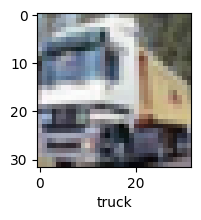

In [8]:
plot_sample(X_train,y_train,1)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

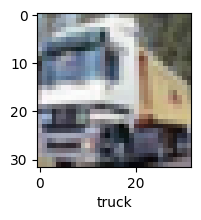

In [10]:
plot_sample(X_train,y_train,1)

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
history=cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4692 - accuracy: 0.4730
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1232 - accuracy: 0.6041
Epoch 3/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9874 - accuracy: 0.6561
Epoch 4/5
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9029 - accuracy: 0.6859
Epoch 5/5
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8403 - accuracy: 0.7087


In [29]:
# def ShowMeWhatYouLearnt(Image, layer, cnn):
#     img = img_to_array(Image)
#     img = np.expand_dims(img, 0)
    
#     inputs = cnn.inputs
#     outputs = cnn.layers[layer].output
#     model = cnn(inputs=inputs, outputs=outputs)
#     model.summary()
    
#     featureMaps = model.predict(img)
    
#     for maps in featureMaps:
#         plt.figure(figsize=(20,20))
#         pltNum = 1
        
#         for a in range(8):
#             for b in range(8):
#                 plt.subplot(8, 8, pltNum)
#                 plt.imshow(maps[: ,: ,pltNum - 1], cmap='gray')
#                 pltNum += 1
        
#         plt.show()

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

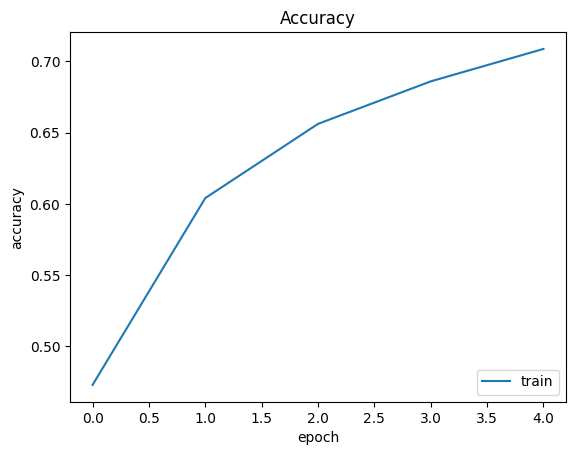

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'],loc='lower right')
plt.show()

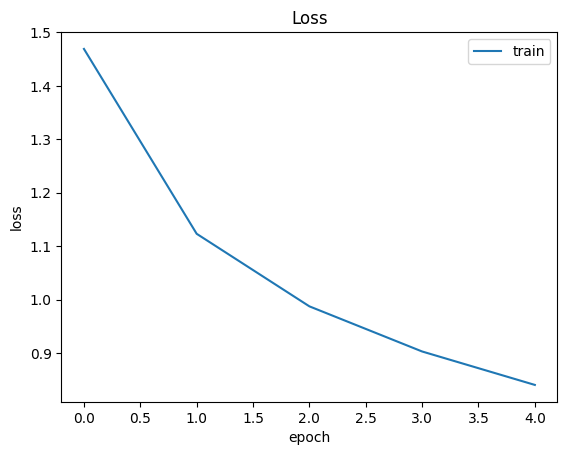

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'],loc='upper right')
plt.show()

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9318 - accuracy: 0.6841


[0.9318027496337891, 0.6840999722480774]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[2.3970138e-03, 1.5434842e-04, 9.1240136e-03, 8.0904388e-01,
        5.9405407e-03, 1.7048551e-01, 1.1966287e-03, 5.1179755e-04,
        1.0198253e-03, 1.2645325e-04],
       [5.1518262e-04, 3.0886659e-03, 3.0189015e-06, 3.6825369e-07,
        1.5037573e-06, 3.8819135e-08, 1.6125632e-07, 3.4623131e-08,
        9.9581587e-01, 5.7510764e-04],
       [5.0716303e-02, 4.5634010e-01, 1.9176742e-02, 1.6582733e-02,
        5.1158136e-03, 8.1281234e-03, 1.3530391e-03, 4.8429524e-03,
        3.4508044e-01, 9.2663735e-02],
       [6.4429569e-01, 1.9462131e-02, 3.4359559e-02, 9.5238071e-04,
        8.6966314e-04, 4.5034365e-05, 2.4740997e-04, 1.0168729e-05,
        2.9827076e-01, 1.4871891e-03],
       [2.6969972e-05, 7.1028087e-05, 5.9747703e-02, 4.3400813e-02,
        5.9139526e-01, 9.2005059e-03, 2.9578447e-01, 2.0749740e-04,
        1.4749229e-04, 1.8176506e-05]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [33]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

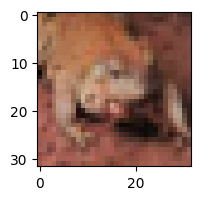

In [36]:
plot_sample(X_test,y_test,5)

In [37]:
classes[y_classes[5]]

'frog'